In [ ]:
import numpy as np
import json
import pdb
from matplotlib import pyplot as plt
import os

import pip
%pip install scikit-image
%pip install sklearn

In [3]:
from scipy.ndimage import binary_dilation, binary_erosion, binary_hit_or_miss
import random
import skimage

from ListSelEm import *
from Utils import Process, Change_Colour

In [4]:
"""
Example program for Category A Simple
"""

print("--------------------------")
print("------ CAT A SIMPLE ------")
print("--------------------------")


def _perform_CatA_Simple(img, op, se):
    list_se = ['SE1', 'SE2', 'SE3', 'SE4', 'SE5', 'SE6', 'SE7', 'SE8']
    list_se_idx = list_se.index(se)
    if op == 'Dilation':
        return binary_dilation(img, list_se_3x3[list_se_idx])
    elif op == 'Erosion':
        return binary_erosion(img, list_se_3x3[list_se_idx])


idx_select = np.random.randint(100)  # Example Number

# Load the dataset.
with open("./Dataset/CatA_Simple/Task{:03d}.json".format(idx_select), 'r') as f:
    data = json.load(f)

# Load the solution.
with open("./Dataset/CatA_Simple/Task{:03d}_soln.txt".format(idx_select), 'r') as f:
    list_ops = f.readlines()
list_ops = [x.split() for x in list_ops]

for d in data:
    img = np.array(d['input'], dtype=np.int32)
    for op, se in list_ops:
        img = _perform_CatA_Simple(img, op, se)
    img = img*1

    print(img)

    out = np.array(d['output'], dtype=np.int32)

    print(out)
    
    check_same = np.all(img == out)
    if check_same:
        print("Program works!!")
    else:
        print("Something went wrong!!")

--------------------------
------ CAT A SIMPLE ------
--------------------------
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0

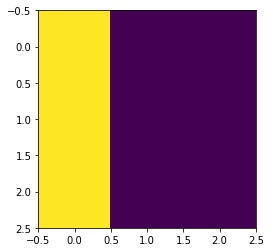

In [5]:
plt.imshow(list_se_3x3[5])
plt.show()

(15, 15)


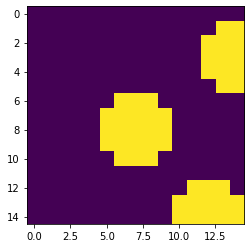

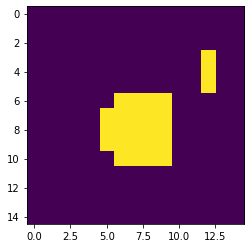

In [7]:
f = open('Dataset/CatA_Simple/Task000.json')
data = json.load(f)
# print(data[0]['input'])
ip = np.array(data[0]['input'])
op = np.array(data[0]['output'])

print(ip.shape)

plt.imshow(ip)
plt.show()

plt.imshow(op)
plt.show()

In [8]:
def generate_classification_dataset(dilation_erosion_option, se_number, task_num):
    class_num = 0

    with open(f'Dataset/CatA_Simple/Task{task_num}_soln.txt') as f:
        for line in f.readlines():
            class_num = class_num + 1
            if(line.find(dilation_erosion_option) != -1 and line.find(se_number) != -1):
                return class_num
    
    return 0


In [18]:
## Generating the 'y' class labels of the dataset
y_dataset_labels = []
for i in range(100):
    ans = generate_classification_dataset("Dilation", "SE6", f'{i:03d}')
    for j in range(4):
        y_dataset_labels.append(ans)

y_dataset_labels = np.array(y_dataset_labels)
print(y_dataset_labels)
print(y_dataset_labels.shape)

[3 3 3 3 0 0 0 0 3 3 3 3 0 0 0 0 4 4 4 4 2 2 2 2 0 0 0 0 2 2 2 2 1 1 1 1 0
 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0 0 0 0 0 0 0 0 1 1 1 1 4 4
 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 0 0 0 0 4 4 4
 4 4 4 4 4 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 2 2 2 2
 2 2 2 2 0 0 0 0 3 3 3 3 1 1 1 1 2 2 2 2 0 0 0 0 0 0 0 0 3 3 3 3 0 0 0 0 0
 0 0 0 4 4 4 4 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 2 2 2 2 2 2
 2 2 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 3 3 3 3 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 2 2 2 0 0 0 0 4 4 4 4 4 4 4 4 1 1 1 1 0 0 0 0 4 4 4 4 3 3
 3 3 2 2 2 2 0 0 0 0 2 2 2 2 1 1 1 1 0 0 0 0 1 1 1 1 0 0 0 0]
(400,)


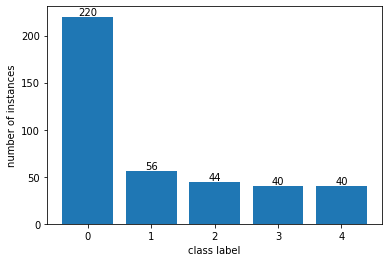

In [30]:
from collections import Counter
c = Counter(y_dataset_labels)

plt.bar(c.keys(), c.values())
for i in range(5):
    plt.text(i, c[i], str(c[i]), ha='center', va='bottom')
plt.xlabel('class label')
plt.ylabel('number of instances')
plt.show()

In [ ]:
c = Counter(y_dataset_labels)

plt.bar(c.keys(), c.values())
for i in range(5):
    plt.text(i, c[i], str(c[i]), ha='center', va='bottom')
plt.xlabel('class label')
plt.ylabel('number of instances')
plt.show()

In [195]:
print(list_se_3x3[5])

[[1 0 0]
 [1 0 0]
 [1 0 0]]


In [319]:
def generate_features(task_num, se_num, y_dataset_labels):
    f = open(f'Dataset/CatA_Simple/Task{task_num}.json')
    data = json.load(f) 

    x = np.zeros((4, 459))
    y_label_index = int(task_num)

    se_features = np.array(list_se_3x3[se_num-1])
    se_features= np.reshape(se_features, (1, -1))
    se_features = se_features[0]

    for i in range(4):
        index = 0
        ip = np.array(data[i]['input'])
        op = np.array(data[i]['output']) 

        for j in range(ip.shape[0]):
            for k in range(ip.shape[1]):
                #pixel_diff = op[j][k] - ip[j][k]
                #x[i][index] = pixel_diff
                x[i][index] = ip[j][k]
                x[i][index + 1] = op[j][k]
                index = index + 2
        
        for j in range(9):
            if(y_dataset_labels[y_label_index*4 + i] != 0):
                x[i][450+j] = se_features[j]
            else:
                x[i][450+j] = 0
             
    return x

In [320]:
##Generating the 'x' features of the dataset:
x_features = np.array([])
for i in range(100):
    if i == 0:
        x_features = generate_features(f'{i:03d}', 6, y_dataset_labels=y_dataset_labels)
    else:
        x_features = np.append(x_features, generate_features(f'{i:03d}', 6, y_dataset_labels=y_dataset_labels), axis = 0)
print(x_features.shape)

print(x_features)

(400, 459)
[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [291]:
#from sklearn.feature_selection import VarianceThreshold
#sel = VarianceThreshold(threshold=0.95*(1-0.95))
#x_features = sel.fit_transform(x_features)

#print(x_features.shape)

In [321]:
## mean center the data
means = np.mean(x_features, axis = 0)
print(means.shape)

for i in range(x_features.shape[0]):
    for j in range(x_features.shape[1]):
        x_features[i][j] = x_features[i][j] - means[j]

print(x_features)

(459,)
[[-0.07   0.    -0.085 ...  0.55   0.     0.   ]
 [-0.07   0.    -0.085 ...  0.55   0.     0.   ]
 [-0.07   0.    -0.085 ...  0.55   0.     0.   ]
 ...
 [-0.07   0.    -0.085 ... -0.45   0.     0.   ]
 [-0.07   0.    -0.085 ... -0.45   0.     0.   ]
 [-0.07   0.    -0.085 ... -0.45   0.     0.   ]]


In [303]:
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\ASUS\OneDrive\Documents\Python\python.exe -m pip install --upgrade pip' command.


136.43482427232297


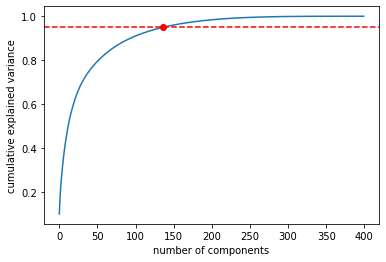

In [322]:
import sklearn
from sklearn.decomposition import PCA
pca = PCA().fit(x_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='--')
threshold = 0.95
x_intercept = np.interp(threshold, np.cumsum(pca.explained_variance_ratio_), range(len(pca.explained_variance_ratio_)))
plt.plot(x_intercept, threshold, 'ro')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
print(x_intercept)

In [323]:
pca = PCA(n_components=136)
pca.fit(x_features)
x_features_pca = pca.transform(x_features)
print(x_features_pca)

[[ 1.50117471  0.16813395 -2.27730166 ...  0.43750158 -0.06473079
   0.15683582]
 [-1.22346375  4.55206499  1.00694136 ... -0.10945394  0.12566223
  -0.11000371]
 [ 2.76267735 -1.74694849  2.30713948 ...  0.19971518 -0.02414363
  -0.0112859 ]
 ...
 [ 2.80203436 -0.313828    2.10135527 ...  0.00706538 -0.21355584
  -0.05982221]
 [ 0.20241559  1.25516216 -1.15052819 ...  0.00459702  0.03016322
   0.07348602]
 [-1.78069465  0.44597396 -1.04107383 ... -0.14094194  0.12963488
  -0.13148665]]


In [324]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_features_pca, y_dataset_labels, test_size = 0.2, random_state=42,
                                                    shuffle=True, stratify=y_dataset_labels)

print(X_train.shape)
print(X_train)

print(y_train.shape)
print(y_train)


(320, 136)
[[ 1.11267941e+00  1.36903312e+00 -1.60650401e+00 ... -9.27865403e-02
   1.24917102e-01 -2.95426835e-02]
 [-1.64386483e+00  1.28509400e+00  2.64714194e-03 ...  3.55508420e-01
   1.49391427e-01 -2.80152446e-01]
 [ 1.97163338e+00 -7.03108356e-02 -1.95052131e+00 ...  1.28838686e-01
   4.56188839e-01  1.00870652e-01]
 ...
 [ 2.43828329e+00 -2.99972652e+00 -9.63360744e-01 ... -3.37794135e-03
   2.47523104e-02  5.57603311e-02]
 [-1.53605718e+00  4.24183093e-01  2.24083647e+00 ... -2.44345323e-01
  -3.16035926e-01  3.57835096e-01]
 [ 2.64447197e+00 -1.35675694e+00  6.37324647e-01 ...  1.85972819e-01
   1.39040560e-01  1.88906933e-02]]
(320,)
[0 0 0 1 0 0 2 0 4 1 4 3 2 0 0 4 0 0 0 1 0 4 0 1 4 3 0 1 3 2 0 2 0 0 4 2 0
 1 0 0 2 4 4 0 0 2 1 0 0 0 0 0 3 0 2 3 1 1 0 0 0 0 2 1 3 0 0 0 0 1 0 0 0 2
 0 1 4 1 0 0 2 3 0 0 0 0 0 4 1 1 0 3 3 0 0 4 0 0 0 0 0 2 0 3 0 3 4 1 1 4 0
 1 3 4 0 0 0 1 0 0 1 1 0 0 4 2 4 1 1 0 0 3 3 0 0 2 0 4 0 0 1 0 2 3 2 0 0 0
 2 0 0 3 3 2 2 0 1 4 0 2 0 0 0 0 1 2 2 0 0 1 0

[0.36363636 1.42857143 1.81818182 2.         2.        ]
0.71875
Train accuracy = 1.0
None
Test accuracy = 0.75
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.44      0.64      0.52        11
           2       0.33      0.33      0.33         9
           3       0.50      0.38      0.43         8
           4       0.60      0.38      0.46         8

    accuracy                           0.75        80
   macro avg       0.57      0.54      0.55        80
weighted avg       0.76      0.75      0.75        80



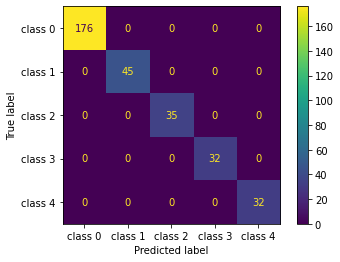

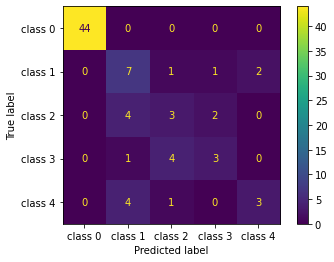

In [325]:
from sklearn.utils import class_weight
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
class_weight = class_weight.compute_class_weight(class_weight='balanced', classes=[0, 1, 2, 3, 4], y=y_dataset_labels)
print(class_weight)

class_weight_dict = dict()
for i in range(5):
    class_weight_dict[i] = class_weight[i]

C_values = []
current_value = 0.005
while current_value <= 0.1:
    C_values.append(current_value)
    current_value += 0.005

acc_list = []

for c in C_values:
    cv = StratifiedKFold(n_splits=5)
    model = LogisticRegression(solver = 'lbfgs', class_weight=class_weight_dict, penalty='l2', C=c, multi_class='multinomial')
    scores = cross_val_score(model, X_train, y_train, n_jobs=-1,scoring='accuracy')
    acc_list.append(scores.mean(axis=0))

print(max(acc_list))
indices = [index for index, item in enumerate(acc_list) if item == max(acc_list)]
model = LogisticRegression(solver='lbfgs', class_weight=class_weight_dict, penalty='l2', C=indices[0], multi_class='multinomial')
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print(print(f'Train accuracy = {accuracy_score(y_pred=y_train_pred, y_true=y_train)}'))
print(f'Test accuracy = {accuracy_score(y_pred=y_pred, y_true=y_test)}')
print(classification_report(y_true=y_test, y_pred=y_pred))

cm_train = confusion_matrix(y_true=y_train, y_pred=y_train_pred)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=['class 0', 'class 1', 'class 2', 'class 3', 'class 4'])
cm_train_display.plot()
plt.show()

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 0', 'class 1', 'class 2', 'class 3', 'class 4'])
cm_display.plot()
plt.show()

In [326]:
#Using Recursive Feature Elimination
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

min_features_to_select = 75
model = LogisticRegression(solver='lbfgs', class_weight=class_weight_dict, penalty='l2', C=indices[0], multi_class='multinomial')
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator = model,
    step = 1,
    cv = cv,
    scoring="accuracy",
    min_features_to_select = 75,
    n_jobs=2,
)

rfecv.fit(X_train, y_train)

print(f"Optimal Number of features: {rfecv.n_features_}")


Optimal Number of features: 102


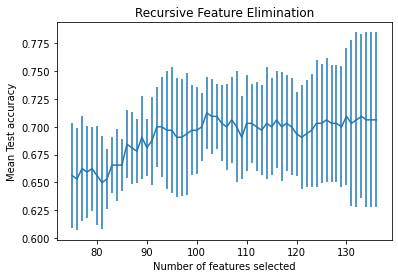

In [327]:
n_scores = len(rfecv.cv_results_["mean_test_score"])
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean Test accuracy")
plt.errorbar(
    range(min_features_to_select, n_scores + min_features_to_select),
    rfecv.cv_results_["mean_test_score"],
    yerr=rfecv.cv_results_["std_test_score"],
)
plt.title("Recursive Feature Elimination")
plt.show()

0.7875
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.43      0.55      0.48        11
           2       0.50      0.33      0.40         9
           3       0.67      0.75      0.71         8
           4       0.57      0.50      0.53         8

    accuracy                           0.79        80
   macro avg       0.63      0.63      0.62        80
weighted avg       0.79      0.79      0.78        80



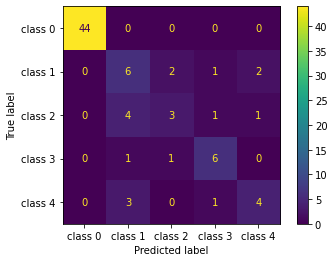

In [328]:
from sklearn.metrics import accuracy_score
y_pred = rfecv.predict(X_test)
print(accuracy_score(y_pred=y_pred, y_true=y_test))
print(classification_report(y_true=y_test, y_pred=y_pred))

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 0', 'class 1', 'class 2', 'class 3', 'class 4'])
cm_display.plot()
plt.show()


In [359]:
final_logistic_model = rfecv.estimator_

In [217]:
#Trying SequentialFeatureSelection Greedy Approach of Subset Selection
num_features_test = list(range(100, 137))
from sklearn.feature_selection import SequentialFeatureSelector
model = LogisticRegression(solver='lbfgs', class_weight=class_weight_dict, penalty='l2', C=indices[0], multi_class='multinomial')

#acc_list = []
#for num_feature in num_features_test:
    #sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=num_feature, direction='backward',
                                    #scoring='accuracy', n_jobs=-1)
    #sfs.fit(X_train, y_train)
    #accuracy = accuracy_score(y_pred=model.predict(X_train), y_true=y_train)
    #acc_list.append(accuracy)

#feature_indices = [index for index, item in enumerate(acc_list) if item == max(acc_list)]
model = LogisticRegression(solver='lbfgs', class_weight=class_weight_dict, penalty='l2', C=indices[0], multi_class='multinomial')
sfs = SequentialFeatureSelector(estimator=model, n_features_to_select=100, direction='backward',
                                    scoring='accuracy', n_jobs=-1)
sfs.fit(X_train, y_train)
sfs.transform(X_train)
print(X_train.shape)


(320, 136)


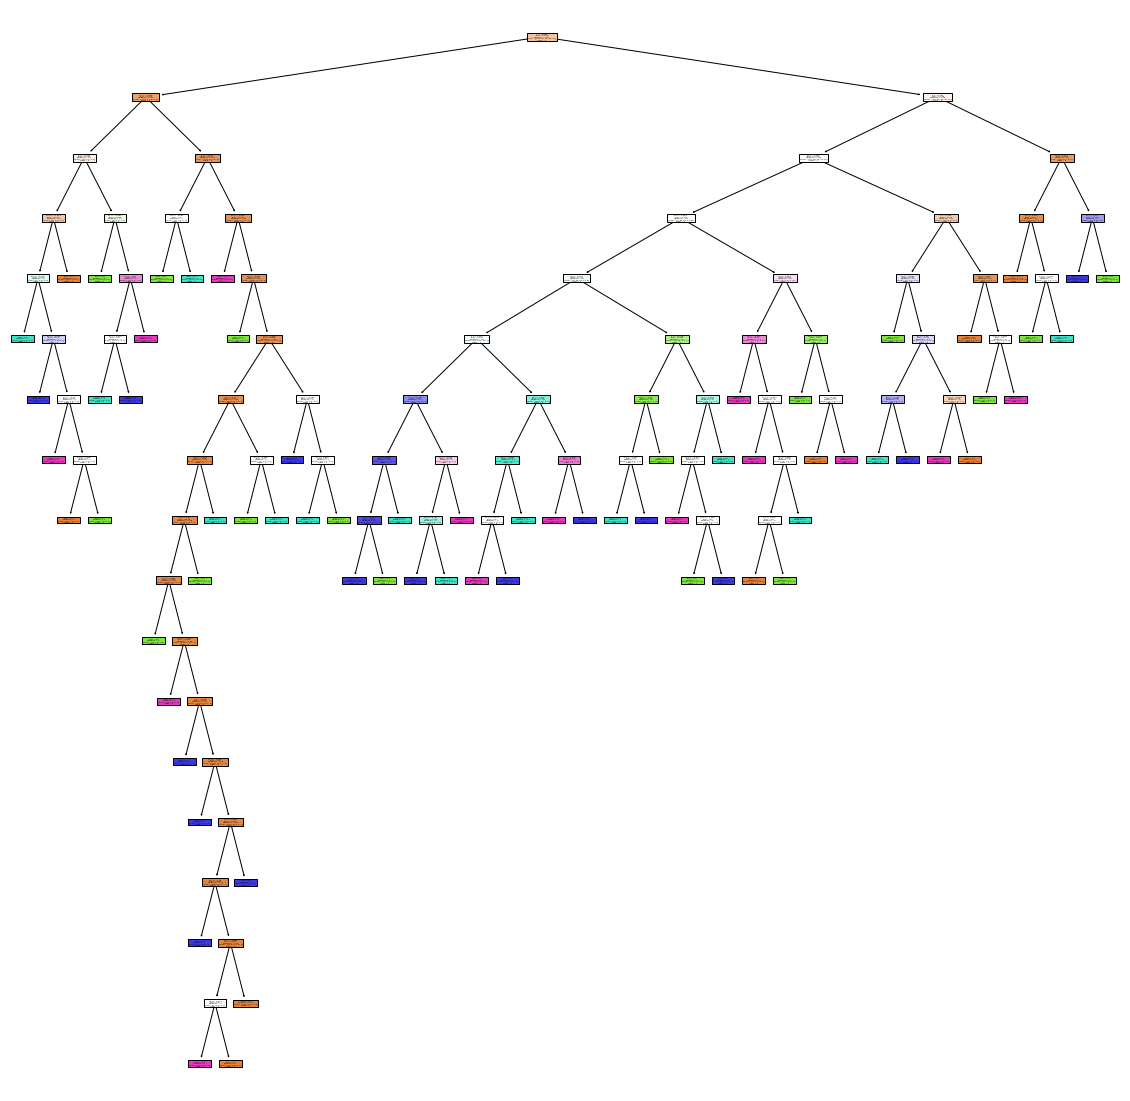

In [218]:
#Lets try fitting a single decision tree
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix

#fitting a decision tree without fine tuning
clf = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)


##Visualizing the decision tree
plt.figure(figsize=(20, 20))
features = [str(i) for i in range(137)]
classes = ['0', '1', '2', '3', '4']
tree.plot_tree(clf, feature_names=features, class_names=classes, filled=True)
plt.show()



In [219]:
print(clf.tree_.max_depth)

17


In [220]:
def plot_confusion_matrix(y_train_predict, y_train, dom):
    print(f'{dom} Confusion Matrix')
    cm = confusion_matrix(y_pred=y_train_predict, y_true=y_train)
    cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class 0', 'class 1', 'class 2', 'class 3', 'class 4'])
    cm_display.plot()
    plt.show()
    

Train score 1.0
Test score 0.5375
Train Confusion Matrix


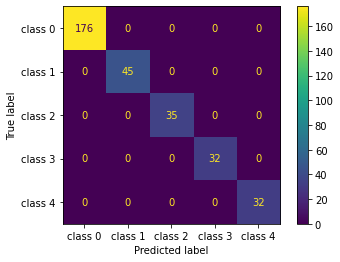

Test Confusion Matrix


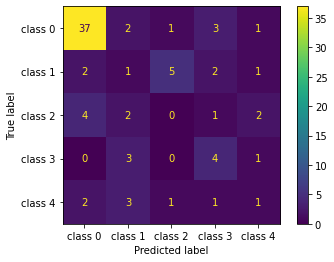

In [221]:
print(f'Train score {accuracy_score(y_train_predict, y_train)}')
print(f'Test score {accuracy_score(y_test_predict, y_test)}')
plot_confusion_matrix(y_train_predict, y_train, dom='Train')
plot_confusion_matrix(y_test_predict, y_test, dom='Test')

#Model Overfits!!!!

Train score 0.95
Test score 0.55
Train Confusion Matrix


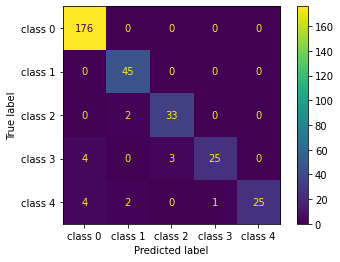

Test Confusion Matrix


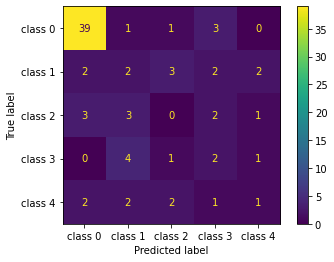

In [222]:
#Pre Pruning Techniques
params = {'max_depth' : [10, 12, 14, 16, 18, 20, 22],
          'min_samples_split': [2, 3, 4, 5, 6],
          'min_samples_leaf':[1, 2, 3]}

clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params)
gcv.fit(X_train, y_train)

model = gcv.best_estimator_
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')
plot_confusion_matrix(y_train_pred, y_train, dom='Train')
plot_confusion_matrix(y_test_pred ,y_test, dom='Test')


In [223]:
#Cost Complexity Post Pruning of the Best Decision Tree
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)
print(ccp_alphas.shape)

[0.         0.0031002  0.003125   0.003125   0.003125   0.003125
 0.003125   0.003125   0.003125   0.003125   0.003125   0.003125
 0.00416667 0.00416667 0.0046875  0.005      0.00558036 0.0059472
 0.00625    0.00625    0.00625    0.00625    0.00729167 0.00729167
 0.0075     0.0075     0.008125   0.008125   0.00820312 0.00830841
 0.008625   0.00992647 0.00997869 0.0104181  0.01050595 0.01052083
 0.01080667 0.01085404 0.01153869 0.0123071  0.01235197 0.01355109
 0.01465707 0.01480847 0.01791245 0.02059521 0.02144878 0.02419177
 0.03880959 0.07227329]
(50,)


Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

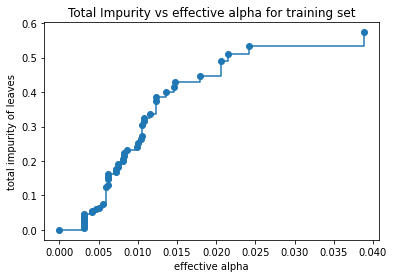

In [224]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

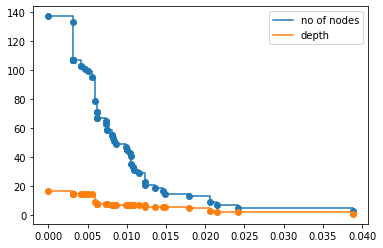

In [225]:
#for each alpha, append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

#remove the last clf and ccp_alpha, because it corresponds to a trivial tree with one node
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas, node_counts)
plt.scatter(ccp_alphas, depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

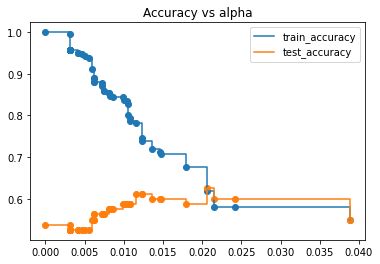

In [226]:
train_acc = []
test_acc = []
for clf in clfs:
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    train_acc.append(accuracy_score(y_pred=y_train_pred, y_true=y_train))
    test_acc.append(accuracy_score(y_pred=y_test_pred, y_true=y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

Train score 0.78125
Test score 0.6125
Train Confusion Matrix


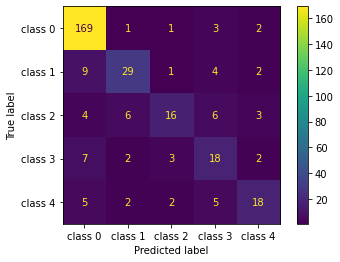

Test Confusion Matrix


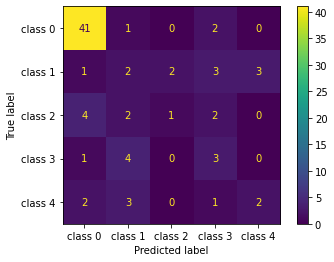

In [242]:
clf_best = tree.DecisionTreeClassifier(random_state=42, ccp_alpha=0.012)
clf_best.fit(X_train, y_train)
y_train_pred = clf_best.predict(X_train)
y_test_pred = clf_best.predict(X_test)

print(f'Train score {accuracy_score(y_train_pred, y_train)}')
print(f'Test score {accuracy_score(y_test_pred, y_test)}')
plot_confusion_matrix(y_train_pred, y_train, dom='Train')
plot_confusion_matrix(y_test_pred ,y_test, dom='Test')

In [362]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=[0, 1, 2, 3, 4], y=y_dataset_labels)
print(class_weights)
class_weight_dict = dict()
for i in range(5):
    class_weight_dict[i] = class_weights[i]

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['sqrt', 'auto', 'log2']
max_depth = [int(x) for x in np.linspace(start=10, stop = 20, num=5)]
max_depth.append(None)
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators':n_estimators,
               'max_features': max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}

rf = RandomForestClassifier(class_weight=class_weight_dict,ccp_alpha=0.012)

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                               n_iter=200, cv = 3, verbose=2, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)



[0.36363636 1.42857143 1.81818182 2.         2.        ]
Fitting 3 folds for each of 200 candidates, totalling 600 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(ccp_alpha=0.012,
                                                    class_weight={0: 0.36363636363636365,
                                                                  1: 1.4285714285714286,
                                                                  2: 1.8181818181818181,
                                                                  3: 2.0,
                                                                  4: 2.0}),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 12, 15, 17, 20, None],
                                        'max_features': ['sqrt', 'auto',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [229]:
from sklearn.metrics import recall_score, precision_score
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_score(y_pred=predictions, y_true=test_labels)
    recall = recall_score(y_pred=predictions, y_true=test_labels, average='macro')
    precision = precision_score(y_pred=predictions, y_true=test_labels,average='macro')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print('Precision = {:0.2f}%.'.format(precision))
    print('Recall = {:0.2f}%.'.format(recall))

Accuracy = 0.55%.
Precision = 0.39%.
Recall = 0.24%.
Train Confusion Matrix


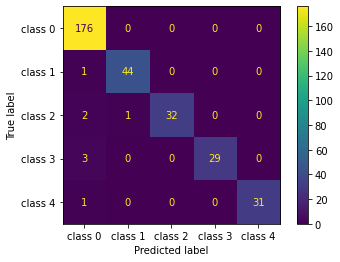

Test Confusion Matrix


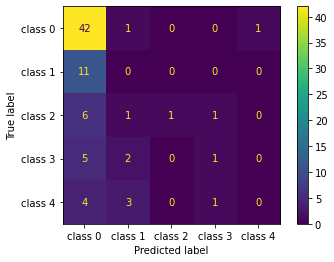

In [363]:
base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
evaluate(base_model, X_test, y_test)

y_train_pred = base_model.predict(X_train)
y_test_pred = base_model.predict(X_test)

plot_confusion_matrix(y_train_pred, y_train, dom='Train')
plot_confusion_matrix(y_test_pred ,y_test, dom='Test')

Accuracy = 0.65%.
Precision = 0.43%.
Recall = 0.40%.
Train Confusion Matrix


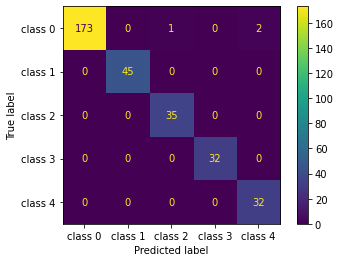

Test Confusion Matrix


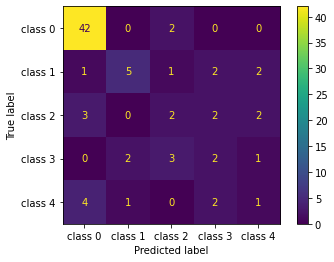

In [364]:
best_random = rf_random.best_estimator_
evaluate(best_random, X_test, y_test)

y_train_pred = best_random.predict(X_train)
y_test_pred = best_random.predict(X_test)

plot_confusion_matrix(y_train_pred, y_train, dom='Train')
plot_confusion_matrix(y_test_pred ,y_test, dom='Test')

In [243]:
#Using the Extra Tree Classifier
print(rf_random.best_params_)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 12, 'bootstrap': False}


In [365]:
best_random_forest = rf_random.best_estimator_

[0.36363636 1.42857143 1.81818182 2.         2.        ]
Fitting 3 folds for each of 270 candidates, totalling 810 fits


c:\Users\ASUS\OneDrive\Documents\Python\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy = 0.60%.
Precision = 0.30%.
Recall = 0.28%.
Train Confusion Matrix


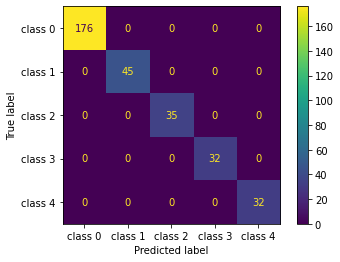

Test Confusion Matrix


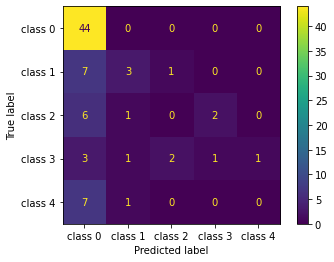

In [247]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=[0, 1, 2, 3, 4], y=y_dataset_labels)
print(class_weights)

class_weight_dict = dict()
for i in range(5):
    class_weight_dict[i] = class_weights[i]

param_grid = {
    'bootstrap' : [False],
    'max_depth' : [8, 10, 12],
    'max_features' : ['auto', 'sqrt'],
    'min_samples_leaf' : [2, 3, 4],
    'min_samples_split': [2, 4, 6],
    'n_estimators': [10, 30, 50, 100, 150]
}

forest = ExtraTreesClassifier(n_jobs=-1, class_weight=class_weight_dict)
grid_search = GridSearchCV(estimator = forest, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
best_grid = grid_search.best_estimator_

evaluate(best_grid, X_test, y_test)
y_train_pred = best_grid.predict(X_train)
y_test_pred = best_grid.predict(X_test)

plot_confusion_matrix(y_train_pred, y_train, dom='Train')
plot_confusion_matrix(y_test_pred ,y_test, dom='Test')


In [253]:
print(grid_search.best_params_)

TOP_FEATURES = 20
importances = best_grid.feature_importances_
std = np.std(
    [tree.feature_importances_ for tree in best_grid.estimators_],
    axis = 0
)
indices = np.argsort(importances)[::-1]
indices = indices[:TOP_FEATURES]

print('Top Fetaures:')
for f in range(TOP_FEATURES):
    print('%d. feature %d (%f)' % (f + 1, indices[f], importances[indices[f]]))

{'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 100}
Top Fetaures:
1. feature 7 (0.029383)
2. feature 8 (0.028278)
3. feature 10 (0.020405)
4. feature 33 (0.016681)
5. feature 36 (0.016127)
6. feature 74 (0.015676)
7. feature 31 (0.013833)
8. feature 11 (0.012968)
9. feature 79 (0.012350)
10. feature 18 (0.011746)
11. feature 120 (0.011738)
12. feature 92 (0.011517)
13. feature 44 (0.011280)
14. feature 54 (0.011141)
15. feature 117 (0.010420)
16. feature 132 (0.010106)
17. feature 19 (0.010018)
18. feature 65 (0.009949)
19. feature 34 (0.009868)
20. feature 26 (0.009513)


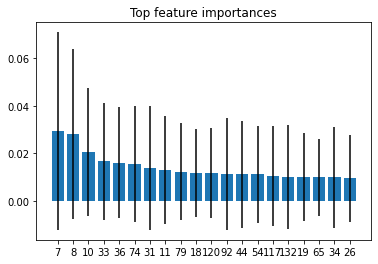

In [254]:
plt.figure()
plt.title('Top feature importances')
plt.bar(
    range(TOP_FEATURES), 
    importances[indices],
    yerr=std[indices], 
)
plt.xticks(range(TOP_FEATURES), indices)
plt.show()

In [272]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

model = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=4, min_samples_leaf=2, max_depth=2,
                                   max_features='sqrt', subsample=0.8, random_state=42)
param_test_1 = {'n_estimators':range(10, 300, 10)}

grid_1 = GridSearchCV(estimator=model, param_grid=param_test_1, scoring='accuracy', n_jobs=-1, cv = 3)
grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
print(grid_1.best_score_)


{'n_estimators': 270}
0.6156762475753835


In [273]:
param_test_2 = {'max_depth': range(1, 5, 1),
                'min_samples_split' : range(4, 8, 2)}
grid_2 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.15, n_estimators=270, max_features='sqrt',
                                                           subsample=0.8, random_state=42),
        param_grid= param_test_2, scoring='accuracy', n_jobs=-1, cv=3)
grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
print(grid_2.best_score_)

{'max_depth': 1, 'min_samples_split': 4}
0.6249926526773644


In [277]:
param_test_3 = {'min_samples_leaf': range(4, 20, 2),
                'min_samples_split' : range(4, 8, 2)}
grid_3 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.15, n_estimators=270, max_features='sqrt',
                                                           max_depth = 1, subsample=0.8, random_state=42),
        param_grid= param_test_3, scoring='accuracy', n_jobs=-1, cv=3)
grid_3.fit(X_train, y_train)
print(grid_3.best_params_)
print(grid_3.best_score_)

{'min_samples_leaf': 18, 'min_samples_split': 4}
0.6344266149415153


In [275]:
from sklearn.model_selection import cross_validate
def boosterModelEvaluate(model, dtrain, pred, performCV = True, cv_folds = 3):
    model.fit(dtrain, pred)

    y_train_pred = model.predict(dtrain)

    if performCV:
        cv_score = cross_validate(model, dtrain, pred, cv=cv_folds, scoring = 'accuracy')
    
    print("Accuracy: ", accuracy_score(y_pred=y_train_pred, y_true=pred))
    print("CV Score: ", np.mean(cv_score['test_score']))
    plot_confusion_matrix(y_train_pred, pred, dom='Train')
    

Accuracy:  0.9875
CV Score:  0.6093575501087404
Train Confusion Matrix


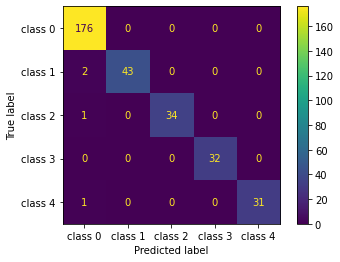

In [276]:
boosterModelEvaluate(grid_3.best_estimator_, X_train, y_train)

In [279]:
param_test_4 = {'max_features':range(90, 105, 1)}
grid_4 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2, n_estimators=270, max_depth=1,
                    min_samples_leaf=18, min_samples_split=6, subsample=0.8, random_state=42), param_grid=param_test_4,
                    scoring='accuracy', n_jobs=4, cv=3)
grid_4.fit(X_train, y_train)
print(grid_4.best_params_)
print(grid_4.best_score_)


{'max_features': 92}
0.6656674307882207


In [280]:
param_test_5 = {'subsample' : [0.6, 0.7, 0.8, 0.85, 0.9]}
grid_5 = GridSearchCV(estimator=GradientBoostingClassifier(learning_rate=0.2, n_estimators=270, max_depth=1,
                    min_samples_leaf=18, min_samples_split=6, max_features = 92, random_state=42), param_grid=param_test_5,
                    scoring='accuracy', n_jobs=4, cv=3)
grid_5.fit(X_train, y_train)
print(grid_5.best_params_)
print(grid_5.best_score_)

{'subsample': 0.8}
0.6656674307882207


Accuracy:  1.0
CV Score:  0.6656674307882207
Train Confusion Matrix


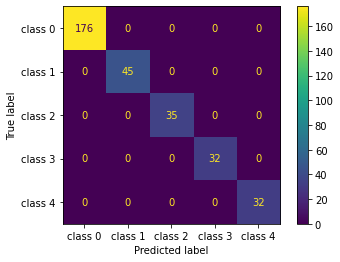

In [286]:
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=270, max_depth=1,
                    min_samples_leaf=18, min_samples_split=6, max_features = 92, subsample = 0.8, random_state=42)
boosterModelEvaluate(gbm_tuned_1, X_train, y_train)


Accuracy = 0.65%.
Precision = 0.35%.
Recall = 0.37%.
Test Confusion Matrix


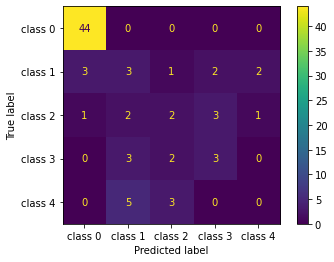

In [288]:
evaluate(gbm_tuned_1, X_test, y_test)
y_test_predict = gbm_tuned_1.predict(X_test)
plot_confusion_matrix(y_test_predict, y_test, dom = 'Test')

In [361]:
final_boosting_classifier = gbm_tuned_1

In [339]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

model = SVC(kernel='rbf', random_state=42, class_weight=class_weight_dict, tol=1e-4)
C_values = []
current_value = 0.0025
while current_value <= 1:
    C_values.append(current_value)
    current_value += 0.0025
param_test_1 = {'C': C_values}

grid_1 = GridSearchCV(estimator=model, param_grid=param_test_1, scoring='accuracy', n_jobs=-1, cv = 3)
grid_1.fit(X_train, y_train)
print(grid_1.best_params_)
print(grid_1.best_score_)

{'C': 0.9049999999999917}
0.6624933874096279


In [340]:
param_test_2 = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
grid_2 = GridSearchCV(estimator=SVC(random_state=42, class_weight=class_weight_dict,
                                    tol=1e-4, C=0.025), param_grid=param_test_2, scoring='accuracy', n_jobs=-1, cv=3)
grid_2.fit(X_train, y_train)
print(grid_2.best_params_)
print(grid_2.best_score_)

{'kernel': 'linear'}
0.6844177981543526


In [352]:
param_test_3 = {'tol': [1e-3, 1e-4, 1e-2, 1e-5]}
grid_3 = GridSearchCV(estimator=SVC(random_state=42, class_weight=class_weight_dict,
                                    C=0.05, kernel='linear'), param_grid=param_test_3, scoring='accuracy', n_jobs=-1, cv=3)
grid_3.fit(X_train, y_train)
print(grid_3.best_params_)
print(grid_3.best_score_)

{'tol': 0.001}
0.6875036736613178


Accuracy = 0.97%.
Precision = 0.96%.
Recall = 0.96%.
Train Confusion Matrix


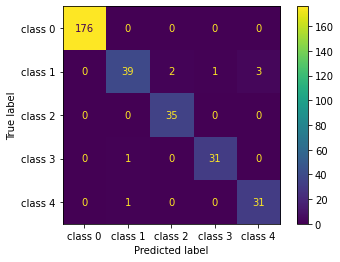

Accuracy = 0.75%.
Precision = 0.55%.
Recall = 0.54%.
Test Confusion Matrix


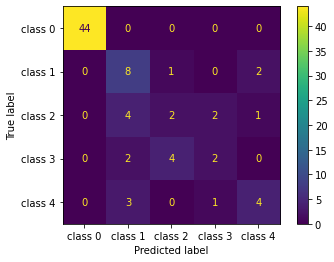

In [353]:
evaluate(grid_3.best_estimator_, X_train, y_train)
y_train_predict = grid_3.predict(X_train)
plot_confusion_matrix(y_train_predict, y_train, dom = 'Train')

evaluate(grid_3.best_estimator_, X_test, y_test)
y_test_predict = grid_3.predict(X_test)
plot_confusion_matrix(y_test_predict, y_test, dom = 'Test')

In [357]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
clf = Pipeline([
    ('feature_selection', SelectFromModel(rfecv.estimator_)),
    ('classification', grid_3.best_estimator_)
])
clf.fit(X_train, y_train)

Pipeline(steps=[('feature_selection',
                 SelectFromModel(estimator=LogisticRegression(C=11,
                                                              class_weight={0: 0.36363636363636365,
                                                                            1: 1.4285714285714286,
                                                                            2: 1.8181818181818181,
                                                                            3: 2.0,
                                                                            4: 2.0},
                                                              multi_class='multinomial'))),
                ('classification',
                 SVC(C=0.05,
                     class_weight={0: 0.36363636363636365,
                                   1: 1.4285714285714286, 2: 1.8181818181818181,
                                   3: 2.0, 4: 2.0},
                     kernel='linear', random_state=42))])

Accuracy = 0.90%.
Precision = 0.83%.
Recall = 0.85%.
Train Confusion Matrix


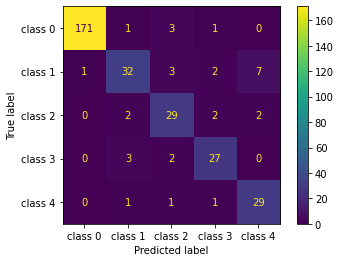

Accuracy = 0.74%.
Precision = 0.56%.
Recall = 0.56%.
Test Confusion Matrix


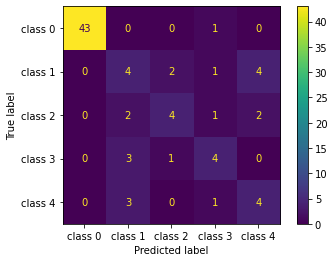

In [358]:
evaluate(clf, X_train, y_train)
y_train_predict = clf.predict(X_train)
plot_confusion_matrix(y_train_predict, y_train, dom = 'Train')

evaluate(clf, X_test, y_test)
y_test_predict = clf.predict(X_test)
plot_confusion_matrix(y_test_predict, y_test, dom = 'Test')